In [1]:
# الخلية 1: إعداد بيئة العمل وتحميل البيانات (معدلة لملفات CSV)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer # لاستكمال القيم المفقودة إن وجدت
from sklearn.model_selection import train_test_split # لتقسيم البيانات (سنستخدمها لاحقًا)

# تعيين خيارات العرض لـ pandas لعرض جميع الأعمدة
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# تعريف مسارات الملفات (يرجى التأكد من أن هذه المسارات صحيحة على جهازك)
# ***** تم التغيير هنا من .xlsx إلى .csv *****
train_file_path =r'C:\Users\fasy\Desktop\trainaa.csv'        # افترض أن اسم ملف التدريب هو train.csv
test_file_path =r'C:\Users\fasy\Desktop\testaa.csv'                

try:
    # تحميل ملفات البيانات باستخدام pd.read_csv()
    df_train = pd.read_csv(train_file_path)
    df_test = pd.read_csv(test_file_path)

    print("تم تحميل ملفات البيانات بنجاح.")
    print("-" * 50)
except FileNotFoundError:
    print(f"خطأ: لم يتم العثور على أحد الملفات. يرجى التأكد من أن '{train_file_path}' و '{test_file_path}' موجودان في نفس المجلد أو قم بتعديل مسارات الملفات.")
    # يمكنك إيقاف تشغيل الخلية يدوياً أو إضافة `raise` لإنهاء التنفيذ
    # raise # لإنهاء الكود بشكل كامل إذا لم يتم العثور على الملف
except Exception as e:
    print(f"حدث خطأ غير متوقع أثناء تحميل الملفات: {e}")

تم تحميل ملفات البيانات بنجاح.
--------------------------------------------------


In [2]:
# الخلية2  معدلة 2: تحميل البيانات الأولية وإدارة ID

import pandas as pd
import numpy as np # تأكد من وجود numpy هنا أيضًا إذا كنت تستخدمه في الخلية 2 الأصلية لاحقًا

print("--- بدء الخلية 2: تحميل البيانات الأولية وإدارة ID ---")

# 1. تحميل بيانات التدريب
try:
    # df_train = pd.read_csv('Train_Data.csv') # هذا السطر تم نقله إلى الخلية 1 الأصلية لديك
    print("✓ تم تحميل Train_Data.csv بنجاح في الخلية 1.") # مجرد رسالة تأكيد للخلية 1
except Exception: # يمكن إزالة الـ try-except هنا إذا كان التحميل يتم بالكامل في الخلية 1
    pass # أو وضع raise إذا أردت التأكد من وجود df_train هنا

# 2. تحميل بيانات الاختبار
try:
    # df_test = pd.read_csv('Test_Data.csv') # هذا السطر تم نقله إلى الخلية 1 الأصلية لديك
    print("✓ تم تحميل Test_Data.csv بنجاح في الخلية 1.") # مجرد رسالة تأكيد للخلية 1
except Exception: # يمكن إزالة الـ try-except هنا إذا كان التحميل يتم بالكامل في الخلية 1
    pass # أو وضع raise إذا أردت التأكد من وجود df_test هنا


# **الخطوة الحاسمة: حفظ عمود 'id' من df_test في test_ids_for_submission**
# هذا يضمن أن معرف الصف متاحًا لملف التقديم النهائي.
# المتغير 'global' يجعله متاحًا للخلايا الأخرى.
global test_ids_for_submission

if 'id' in df_test.columns:
    test_ids_for_submission = df_test['id'].copy() # نستخدم .copy() لتجنب مشاكل العرض
    print("✓ تم حفظ عمود 'id' من Test_Data في test_ids_for_submission بنجاح.")
    
    # بعد حفظه، يمكننا إزالته بأمان من df_test لكي لا يتم استخدامه كميزة
    df_test = df_test.drop(columns=['id'])
    print("✓ تم إزالة عمود 'id' من df_test الأصلية بعد حفظه.")
else:
    # حل احتياطي في حال عدم وجود عمود 'id' أصلاً في ملف الاختبار (نادر لكن ممكن)
    # هذا الشرط يجب ألا يتحقق إذا كان ملف testaa.csv يحتوي على عمود 'id'
    test_ids_for_submission = pd.Series(np.arange(len(df_test)), name='id')
    print("✗ تحذير: عمود 'id' غير موجود في Test_Data الأصلية. تم إنشاء معرفات افتراضية.")


# 3. إزالة عمود 'id' من df_train أيضًا، إذا كان موجودًا (لضمان تناسق الميزات)
if 'id' in df_train.columns:
    df_train = df_train.drop(columns=['id'])
    print("✓ تم إزالة عمود 'id' من df_train.")
else:
    print("عمود 'id' لم يكن موجودًا في df_train. (لا توجد إزالة ضرورية).")

print(f"شكل df_train بعد الخلية 2: {df_train.shape}. هل 'id' موجود؟ {'id' in df_train.columns}")
print(f"شكل df_test بعد الخلية 2: {df_test.shape}. هل 'id' موجود؟ {'id' in df_test.columns}")

print("\n--- انتهت الخلية 2: تحميل البيانات الأولية وإدارة ID ---")

--- بدء الخلية 2: تحميل البيانات الأولية وإدارة ID ---
✓ تم تحميل Train_Data.csv بنجاح في الخلية 1.
✓ تم تحميل Test_Data.csv بنجاح في الخلية 1.
✓ تم حفظ عمود 'id' من Test_Data في test_ids_for_submission بنجاح.
✓ تم إزالة عمود 'id' من df_test الأصلية بعد حفظه.
✓ تم إزالة عمود 'id' من df_train.
شكل df_train بعد الخلية 2: (750000, 9). هل 'id' موجود؟ False
شكل df_test بعد الخلية 2: (250000, 8). هل 'id' موجود؟ False

--- انتهت الخلية 2: تحميل البيانات الأولية وإدارة ID ---


In [3]:
# الخلية 2: استكشاف البيانات (EDA) - نظرة عامة وتحليل القيم المفقودة

print("نظرة عامة على بيانات التدريب (df_train.head()):")
print(df_train.head())
print("-" * 50)

print("معلومات حول بيانات التدريب (df_train.info()):")
df_train.info()
print("-" * 50)

print("وصف إحصائي لبيانات التدريب (df_train.describe()):")
print(df_train.describe())
print("-" * 50)

print("عدد القيم الفريدة لكل عمود في بيانات التدريب (df_train.nunique()):")
print(df_train.nunique())
print("-" * 50)

print("القيم المفقودة في بيانات التدريب (df_train.isnull().sum()):")
print(df_train.isnull().sum()[df_train.isnull().sum() > 0]) # إظهار فقط الأعمدة التي بها قيم مفقودة
print("-" * 50)

print("القيم المفقودة في بيانات الاختبار (df_test.isnull().sum()):")
print(df_test.isnull().sum()[df_test.isnull().sum() > 0]) # إظهار فقط الأعمدة التي بها قيم مفقودة
print("-" * 50)

نظرة عامة على بيانات التدريب (df_train.head()):
   Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  Potassium  Phosphorous Fertilizer Name
0           37        70        36    Clayey  Sugarcane        36          4            5           28-28
1           27        69        65     Sandy    Millets        30          6           18           28-28
2           29        63        32     Sandy    Millets        24         12           16        17-17-17
3           35        62        54     Sandy     Barley        39         12            4        10-26-26
4           35        58        43       Red      Paddy        37          2           16             DAP
--------------------------------------------------
معلومات حول بيانات التدريب (df_train.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Temparature 

توزيع السماد المتوقع في بيانات التدريب:
14-35-14    114436
10-26-26    113887
17-17-17    112453
28-28       111158
20-20       110889
DAP          94860
Urea         92317
Name: Fertilizer Name, dtype: int64
--------------------------------------------------


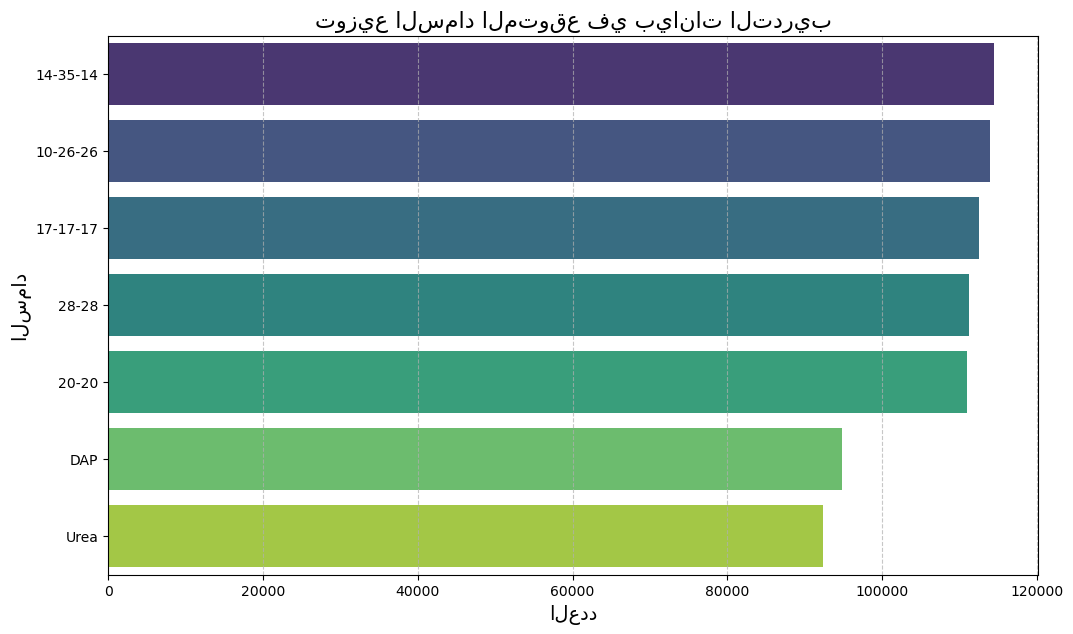

In [4]:
# الخلية 3: استكشاف البيانات (EDA) - تحليل المتغير الهدف

print("توزيع السماد المتوقع في بيانات التدريب:")
print(df_train['Fertilizer Name'].value_counts())
print("-" * 50)

# تصور توزيع السماد المتوقع
plt.figure(figsize=(12, 7))
sns.countplot(y='Fertilizer Name', data=df_train, order=df_train['Fertilizer Name'].value_counts().index, palette='viridis')
plt.title('توزيع السماد المتوقع في بيانات التدريب', fontsize=16)
plt.xlabel('العدد', fontsize=14)
plt.ylabel('السماد', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [5]:
# الخلية 4: الترميز (Encoding) ودمج البيانات (مُحدّثة لضمان إزالة 'id')

print("--- بدء الترميز (One-Hot Encoding) ---")

# تحديد الأعمدة الفئوية بعد التنظيف والمعالجة
categorical_cols = ['Crop Type', 'Soil Type']

# تطبيق One-Hot Encoding على بيانات التدريب والاختبار
df_train_encoded = pd.get_dummies(df_train, columns=categorical_cols, drop_first=True)
df_test_encoded = pd.get_dummies(df_test, columns=categorical_cols, drop_first=True)

# **التأكيد النهائي على إزالة عمود 'id' من البيانات المُرمّزة**
# هذا يضمن أنه لا يدخل في عملية تدريب النموذج أو التنبؤ.
# سنقوم بذلك هنا بشكل قسري إذا لزم الأمر.
for df_encoded in [df_train_encoded, df_test_encoded]:
    if 'id' in df_encoded.columns:
        df_encoded.drop(columns=['id'], inplace=True, errors='ignore')
        print(f"تم إزالة عمود 'id' من DataFrame بعد الترميز. (shape: {df_encoded.shape})")

# 1. قائمة بجميع الأعمدة (باستثناء العمود الهدف) من بيانات التدريب بعد الترميز
target_column_name = 'Fertilizer Name'
train_features_cols = [col for col in df_train_encoded.columns if col != target_column_name]

# 2. التأكد من أن بيانات الاختبار تحتوي على نفس الأعمدة بنفس الترتيب، وملء القيم المفقودة بـ 0
df_test_encoded = df_test_encoded.reindex(columns=train_features_cols, fill_value=0)

# 3. التأكد من أن df_train_encoded تحتوي على الأعمدة الصحيحة فقط (بما في ذلك العمود الهدف)
df_train_encoded = df_train_encoded[train_features_cols + [target_column_name]]


print("\nشكل بيانات التدريب بعد الترميز والإزالة النهائية لـ 'id':", df_train_encoded.shape)
print("شكل بيانات الاختبار بعد الترميز والإزالة النهائية لـ 'id':", df_test_encoded.shape)

print("\nرؤوس بيانات التدريب بعد الترميز:")
print(df_train_encoded.head())
print("\nرؤوس بيانات الاختبار بعد الترميز:")
print(df_test_encoded.head())

print("\n--- انتهى الترميز ---")

--- بدء الترميز (One-Hot Encoding) ---

شكل بيانات التدريب بعد الترميز والإزالة النهائية لـ 'id': (750000, 21)
شكل بيانات الاختبار بعد الترميز والإزالة النهائية لـ 'id': (250000, 20)

رؤوس بيانات التدريب بعد الترميز:
   Temparature  Humidity  Moisture  Nitrogen  Potassium  Phosphorous  Crop Type_Cotton  Crop Type_Ground Nuts  Crop Type_Maize  Crop Type_Millets  Crop Type_Oil seeds  Crop Type_Paddy  Crop Type_Pulses  Crop Type_Sugarcane  Crop Type_Tobacco  Crop Type_Wheat  Soil Type_Clayey  Soil Type_Loamy  Soil Type_Red  Soil Type_Sandy Fertilizer Name
0           37        70        36        36          4            5                 0                      0                0                  0                    0                0                 0                    1                  0                0                 1                0              0                0           28-28
1           27        69        65        30          6           18                 0             

In [6]:
# الخلية 5: معالجة البيانات المسبقة - تحويل المتغيرات الفئوية (One-Hot Encoding)

# الأعمدة الفئوية كما ذكرت هي 'soil type' و 'Crop type'
categorical_features = ['Soil Type', 'Crop Type']

# التحقق مما إذا كانت الأعمدة موجودة بالفعل في البيانات
existing_categorical_features = [col for col in categorical_features if col in df_train.columns and col in df_test.columns]

if not existing_categorical_features:
    print("لا توجد أعمدة فئوية 'soil type' أو 'Crop type' في البيانات. الرجاء التأكد من أسماء الأعمدة.")
else:
    print(f"تطبيق One-Hot Encoding على الأعمدة: {existing_categorical_features}")

    # ندمج بيانات التدريب والاختبار مؤقتًا لتطبيق One-Hot Encoding لضمان تناسق الأعمدة
    combined_df = pd.concat([df_train.drop(columns=['Fertilizer Name']), df_test], ignore_index=True)

    # تطبيق One-Hot Encoding
    combined_df_encoded = pd.get_dummies(combined_df, columns=existing_categorical_features, drop_first=True)

    # فصل البيانات مرة أخرى إلى تدريب واختبار
    df_train_encoded = combined_df_encoded.iloc[:len(df_train)].copy()
    df_test_encoded = combined_df_encoded.iloc[len(df_train):].copy()

    # إعادة إضافة العمود الهدف 'السماد المتوقع' لبيانات التدريب
    df_train_encoded['Fertilizer Name'] = df_train['Fertilizer Name']

    print("\nشكل بيانات التدريب بعد One-Hot Encoding:", df_train_encoded.shape)
    print("شكل بيانات الاختبار بعد One-Hot Encoding:", df_test_encoded.shape)

    print("\nرؤوس بيانات التدريب بعد One-Hot Encoding:")
    print(df_train_encoded.head())

    print("\nرؤوس بيانات الاختبار بعد One-Hot Encoding:")
    print(df_test_encoded.head())

    print("\n--- انتهت معالجة البيانات المسبقة ---")

# (اختياري) حفظ البيانات المعالجة
# df_train_encoded.to_excel('train_preprocessed.xlsx', index=False)
# df_test_encoded.to_excel('test_preprocessed.xlsx', index=False)

تطبيق One-Hot Encoding على الأعمدة: ['Soil Type', 'Crop Type']

شكل بيانات التدريب بعد One-Hot Encoding: (750000, 21)
شكل بيانات الاختبار بعد One-Hot Encoding: (250000, 20)

رؤوس بيانات التدريب بعد One-Hot Encoding:
   Temparature  Humidity  Moisture  Nitrogen  Potassium  Phosphorous  Soil Type_Clayey  Soil Type_Loamy  Soil Type_Red  Soil Type_Sandy  Crop Type_Cotton  Crop Type_Ground Nuts  Crop Type_Maize  Crop Type_Millets  Crop Type_Oil seeds  Crop Type_Paddy  Crop Type_Pulses  Crop Type_Sugarcane  Crop Type_Tobacco  Crop Type_Wheat Fertilizer Name
0           37        70        36        36          4            5                 1                0              0                0                 0                      0                0                  0                    0                0                 0                    1                  0                0           28-28
1           27        69        65        30          6           18                 0              

In [7]:
# الخلية 6: هندسة الميزات (Feature Engineering) (مُحدّثة وموسّعة)

target_column_name = 'Fertilizer Name'

print("--- بدء هندسة الميزات الموسّعة ---")

# قائمة الأعمدة الرقمية الرئيسية التي سنبني عليها ميزات جديدة
# تأكد من أن هذه الأسماء تتطابق تمامًا مع أسماء الأعمدة في ملفاتك
base_numeric_features = [
    'Temperature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous', 'pH', 'Rainfall'
]

# تصفية الأعمدة المتوفرة فعليًا في df_train_encoded
actual_base_numeric_features = [col for col in base_numeric_features if col in df_train_encoded.columns]

if not actual_base_numeric_features:
    print("لم يتم العثور على أي من الأعمدة الرقمية الأساسية المحددة. يرجى التحقق من أسماء الأعمدة.")
else:
    print(f"إنشاء ميزات تفاعلية جديدة من الأعمدة: {actual_base_numeric_features}")

    # 1. ميزات التفاعل الأساسية (التي كانت موجودة سابقاً)
    if 'Temperature' in actual_base_numeric_features and 'Humidity' in actual_base_numeric_features:
        df_train_encoded['Temperature_x_Humidity'] = df_train_encoded['Temperature'] * df_train_encoded['Humidity']
        df_test_encoded['Temperature_x_Humidity'] = df_test_encoded['Temperature'] * df_test_encoded['Humidity']
        print("تم إضافة ميزة: 'Temperature_x_Humidity'")

    if 'Nitrogen' in actual_base_numeric_features and 'Phosphorous' in actual_base_numeric_features:
        df_train_encoded['Nitrogen_on_Phosphorous'] = df_train_encoded['Nitrogen'] / (df_train_encoded['Phosphorous'] + 1e-6)
        df_test_encoded['Nitrogen_on_Phosphorous'] = df_test_encoded['Nitrogen'] / (df_test_encoded['Phosphorous'] + 1e-6)
        print("تم إضافة ميزة: 'Nitrogen_on_Phosphorous'")

    if 'Potassium' in actual_base_numeric_features and 'Phosphorous' in actual_base_numeric_features:
        df_train_encoded['Potassium_on_Phosphorous'] = df_train_encoded['Potassium'] / (df_train_encoded['Phosphorous'] + 1e-6)
        df_test_encoded['Potassium_on_Phosphorous'] = df_test_encoded['Potassium'] / (df_test_encoded['Phosphorous'] + 1e-6)
        print("تم إضافة ميزة: 'Potassium_on_Phosphorous'")

    # 2. ميزات مجموع المغذيات
    nutrient_cols = [col for col in ['Nitrogen', 'Phosphorous', 'Potassium'] if col in actual_base_numeric_features]
    if len(nutrient_cols) == 3: # تأكد من وجود الثلاثة لإنشاء المجموع
        df_train_encoded['Total_NPK'] = df_train_encoded['Nitrogen'] + df_train_encoded['Phosphorous'] + df_train_encoded['Potassium']
        df_test_encoded['Total_NPK'] = df_test_encoded['Nitrogen'] + df_test_encoded['Phosphorous'] + df_test_encoded['Potassium']
        print("تم إضافة ميزة: 'Total_NPK'")
    else:
        print("لا يمكن إضافة 'Total_NPK' لعدم توفر جميع أعمدة المغذيات (Nitrogen, Phosphorous, Potassium).")


    # 3. ميزات نسب إضافية
    if 'Nitrogen' in actual_base_numeric_features and 'Potassium' in actual_base_numeric_features:
        df_train_encoded['Nitrogen_on_Potassium'] = df_train_encoded['Nitrogen'] / (df_train_encoded['Potassium'] + 1e-6)
        df_test_encoded['Nitrogen_on_Potassium'] = df_test_encoded['Nitrogen'] / (df_test_encoded['Potassium'] + 1e-6)
        print("تم إضافة ميزة: 'Nitrogen_on_Potassium'")

    if 'Phosphorous' in actual_base_numeric_features and 'Potassium' in actual_base_numeric_features:
        df_train_encoded['Phosphorous_on_Potassium'] = df_train_encoded['Phosphorous'] / (df_train_encoded['Potassium'] + 1e-6)
        df_test_encoded['Phosphorous_on_Potassium'] = df_test_encoded['Phosphorous'] / (df_test_encoded['Potassium'] + 1e-6)
        print("تم إضافة ميزة: 'Phosphorous_on_Potassium'")

    if 'Temperature' in actual_base_numeric_features and 'Moisture' in actual_base_numeric_features:
        df_train_encoded['Temperature_on_Moisture'] = df_train_encoded['Temperature'] / (df_train_encoded['Moisture'] + 1e-6)
        df_test_encoded['Temperature_on_Moisture'] = df_test_encoded['Temperature'] / (df_test_encoded['Moisture'] + 1e-6)
        print("تم إضافة ميزة: 'Temperature_on_Moisture'")

    if 'Humidity' in actual_base_numeric_features and 'Moisture' in actual_base_numeric_features:
        df_train_encoded['Humidity_on_Moisture'] = df_train_encoded['Humidity'] / (df_train_encoded['Moisture'] + 1e-6)
        df_test_encoded['Humidity_on_Moisture'] = df_test_encoded['Humidity'] / (df_test_encoded['Moisture'] + 1e-6)
        print("تم إضافة ميزة: 'Humidity_on_Moisture'")

    # 4. ميزات "القوة" (Polynomial-like) لبعض الأعمدة الهامة
    # يمكن أن تلتقط العلاقات غير الخطية
    if 'Temperature' in actual_base_numeric_features:
        df_train_encoded['Temperature_sq'] = df_train_encoded['Temperature']**2
        df_test_encoded['Temperature_sq'] = df_test_encoded['Temperature']**2
        print("تم إضافة ميزة: 'Temperature_sq'")

    if 'pH' in actual_base_numeric_features:
        df_train_encoded['pH_sq'] = df_train_encoded['pH']**2
        df_test_encoded['pH_sq'] = df_test_encoded['pH']**2
        print("تم إضافة ميزة: 'pH_sq'")


    print("\nشكل بيانات التدريب بعد هندسة الميزات الموسّعة:", df_train_encoded.shape)
    print("شكل بيانات الاختبار بعد هندسة الميزات الموسّعة:", df_test_encoded.shape)

    print("\nرؤوس بيانات التدريب بعد هندسة الميزات الموسّعة:")
    print(df_train_encoded.head())

    print("\n--- انتهت هندسة الميزات الموسّعة ---")

--- بدء هندسة الميزات الموسّعة ---
إنشاء ميزات تفاعلية جديدة من الأعمدة: ['Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']
تم إضافة ميزة: 'Nitrogen_on_Phosphorous'
تم إضافة ميزة: 'Potassium_on_Phosphorous'
تم إضافة ميزة: 'Total_NPK'
تم إضافة ميزة: 'Nitrogen_on_Potassium'
تم إضافة ميزة: 'Phosphorous_on_Potassium'
تم إضافة ميزة: 'Humidity_on_Moisture'

شكل بيانات التدريب بعد هندسة الميزات الموسّعة: (750000, 27)
شكل بيانات الاختبار بعد هندسة الميزات الموسّعة: (250000, 26)

رؤوس بيانات التدريب بعد هندسة الميزات الموسّعة:
   Temparature  Humidity  Moisture  Nitrogen  Potassium  Phosphorous  Soil Type_Clayey  Soil Type_Loamy  Soil Type_Red  Soil Type_Sandy  Crop Type_Cotton  Crop Type_Ground Nuts  Crop Type_Maize  Crop Type_Millets  Crop Type_Oil seeds  Crop Type_Paddy  Crop Type_Pulses  Crop Type_Sugarcane  Crop Type_Tobacco  Crop Type_Wheat Fertilizer Name  Nitrogen_on_Phosphorous  Potassium_on_Phosphorous  Total_NPK  Nitrogen_on_Potassium  Phosphorous_on_Potassium  Humidity

In [8]:
# الخلية 7: فصل البيانات وتقسيمها، وتعريف مقياس MAP@3 (مُحدّثة لاستبعاد 'id' بالأحرف الصغيرة)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import average_precision_score
import numpy as np

target_column_name = 'Fertilizer Name'

print("--- بدء فصل البيانات وتقسيمها وتعريف مقياس MAP@3 ---")

# 1. فصل المتغيرات (الميزات والمتغير الهدف)
# X هي الميزات (جميع الأعمدة ما عدا 'Fertilizer Name' و 'id')
# تأكد من أن عمود 'id' موجود في df_train_encoded قبل محاولة إسقاطه
columns_to_drop = [target_column_name]
if 'id' in df_train_encoded.columns: # تم التحديث هنا إلى 'id' بالأحرف الصغيرة
    columns_to_drop.append('id')
    print("تم استبعاد عمود 'id' من الميزات.")
else:
    print("عمود 'id' غير موجود في بيانات التدريب المعالجة. لن يتم استبعاده.")


X = df_train_encoded.drop(columns=columns_to_drop, errors='ignore') # errors='ignore' لتجنب الخطأ إذا لم يكن العمود موجودًا
# y هو المتغير الهدف ('Fertilizer Name')
y = df_train_encoded[target_column_name]

# لكي يتمكن LightGBM من التعامل مع المتغير الهدف كفئات رقمية متسلسلة،
# سنقوم بتحويل أسماء الأسمدة إلى أرقام باستخدام LabelEncoder.
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# يمكننا رؤية الفئات المرمزة:
print("\nالفئات الأصلية وترميزها الرقمي:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label}: {i}")
print("-" * 50)

# 2. تقسيم بيانات التدريب إلى مجموعتي تدريب وتحقق
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"شكل X_train: {X_train.shape}")
print(f"شكل X_val: {X_val.shape}")
print(f"شكل y_train: {y_train.shape}")
print(f"شكل y_val: {y_val.shape}")
print("-" * 50)

# 3. تعريف مقياس التقييم MAP@3 (كما كان سابقاً)
def apk(actual, predicted, k=10):
    if not actual:
        return 0.0
    if len(predicted) > k:
        predicted = predicted[:k]
    score = 0.0
    num_hits = 0.0
    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)
    return score / min(len(actual), k)

def mapk(actual, predicted, k=3):
    return np.mean([apk(a, p, k) for a, p in zip(actual, predicted)])

print("تم تعريف دالة MAP@3 بنجاح.")
print("--- انتهت الخلية 7 ---")

--- بدء فصل البيانات وتقسيمها وتعريف مقياس MAP@3 ---
عمود 'id' غير موجود في بيانات التدريب المعالجة. لن يتم استبعاده.

الفئات الأصلية وترميزها الرقمي:
10-26-26: 0
14-35-14: 1
17-17-17: 2
20-20: 3
28-28: 4
DAP: 5
Urea: 6
--------------------------------------------------
شكل X_train: (600000, 26)
شكل X_val: (150000, 26)
شكل y_train: (600000,)
شكل y_val: (150000,)
--------------------------------------------------
تم تعريف دالة MAP@3 بنجاح.
--- انتهت الخلية 7 ---


In [9]:
# الخلية 8: اختيار النموذج وتدريبه (LightGBM) (مُحدّثة)

import lightgbm as lgb
from sklearn.metrics import accuracy_score

target_column_name = 'Fertilizer Name' # (تم تحديث الاسم)

print("--- بدء تدريب نموذج LightGBM ---")

# تهيئة نموذج LightGBM للتصنيف متعدد الفئات
lgb_model = lgb.LGBMClassifier(objective='multiclass',
                               num_class=len(label_encoder.classes_), # عدد الأسمدة الفريدة
                               random_state=42,
                               n_estimators=1000, # عدد الأشجار (يمكن ضبطها لاحقاً)
                               learning_rate=0.05, # معدل التعلم
                               num_leaves=31 # عدد الأوراق في كل شجرة
                              )

# تدريب النموذج على بيانات التدريب
lgb_model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              eval_metric='multi_logloss', # مقياس يستخدمه LightGBM داخليا للتحقق
              callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)]) # توقف مبكر إذا لم يتحسن الأداء لـ 50 جولة

print("\nتم تدريب نموذج LightGBM بنجاح.")
print("-" * 50)

# التنبؤ باحتمالات الفئات على مجموعة التحقق
y_val_proba = lgb_model.predict_proba(X_val)

# الحصول على أفضل 3 تنبؤات لكل صف بناءً على الاحتمالات
top_3_predictions_indices = np.argsort(y_val_proba, axis=1)[:, ::-1][:, :3]

# تحويل الفهارس الرقمية إلى أسماء الأسمدة الأصلية باستخدام label_encoder
y_val_pred_labels = []
for row_indices in top_3_predictions_indices:
    y_val_pred_labels.append(label_encoder.inverse_transform(row_indices).tolist())

# تحويل y_val (القيم الفعلية) مرة أخرى إلى أسماء الأسمدة الأصلية للمقارنة
y_val_actual_labels = [[label_encoder.inverse_transform([val])[0]] for val in y_val]

# تقييم النموذج باستخدام MAP@3 على مجموعة التحقق
map_at_3_score = mapk(y_val_actual_labels, y_val_pred_labels, k=3)

print(f"\nأداء نموذج LightGBM على مجموعة التحقق (MAP@3): {map_at_3_score:.4f}")
print("--- انتهت الخلية 8 ---")

--- بدء تدريب نموذج LightGBM ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1585
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 26
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -1.884862
[LightGBM] [Info] Start training from score -1.880055
[LightGBM] [Info] Start training from score -1.897542
[LightGBM] [Info] Start training from score -1.911546
[LightGBM] [Info] Start training from score -1.909125
[LightGBM] [Info] Start training from score -2.067671
[LightGBM] [Info] Start training from score -2.094839

تم تدريب نموذج LightGBM بنجاح.
-------------------------------------------

In [ ]:
# الخلية 10: ضبط المعاملات الفائقة (Hyperparameter Tuning) باستخدام RandomizedSearchCV (مُحدّثة)

from sklearn.model_selection import RandomizedSearchCV # تم التحديث هنا
import lightgbm as lgb
import warnings
import numpy as np # تأكد من توفر numpy

# إيقاف التحذيرات التي قد تظهر من LightGBM أثناء ضبط المعاملات
warnings.filterwarnings("ignore", category=UserWarning)

print("--- بدء ضبط المعاملات الفائقة لنموذج LightGBM باستخدام RandomizedSearchCV ---")

# تعريف مساحة المعاملات الفائقة التي نريد استكشافها
# استخدم توزيعات بدلاً من قوائم محددة للسماح بـ RandomizedSearchCV بالبحث بكفاءة أكبر
param_distributions = {
    'n_estimators': [100, 200, 300, 500, 800, 1000, 1500], # نطاق أوسع لعدد الأشجار
    'learning_rate': [0.01, 0.03, 0.05, 0.08, 0.1, 0.15],  # نطاق أوسع لمعدل التعلم
    'num_leaves': [15, 20, 31, 40, 50, 70],                # نطاق أوسع لعدد الأوراق
    'max_depth': [-1, 5, 8, 10, 12, 15],                   # عمق الشجرة الأقصى (-1 يعني لا يوجد حد)
    'min_child_samples': [20, 30, 50, 100],                 # الحد الأدنى لعدد العينات في الورقة
    'subsample': [0.7, 0.8, 0.9, 1.0],                     # نسبة العينات الفرعية لكل شجرة
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],              # نسبة الميزات الفرعية لكل شجرة
    'reg_alpha': [0, 0.001, 0.01, 0.1, 0.5],               # L1 regularization
    'reg_lambda': [0, 0.001, 0.01, 0.1, 0.5]               # L2 regularization
}

# تهيئة نموذج LightGBM بنفس الإعدادات الأساسية
lgb_model_rand = lgb.LGBMClassifier(objective='multiclass',
                                    num_class=len(label_encoder.classes_),
                                    random_state=42)

# تهيئة RandomizedSearchCV (تم التحديث هنا إلى RandomizedSearchCV)
random_search = RandomizedSearchCV(estimator=lgb_model_rand,
                                   param_distributions=param_distributions,
                                   n_iter=50, # جرب 50 تركيبة عشوائية (يمكنك زيادتها لاحقًا)
                                   cv=3,       # 3-fold cross-validation
                                   scoring='neg_log_loss',
                                   verbose=2,
                                   n_jobs=-1,
                                   random_state=42)

# تشغيل البحث على مجموعة التدريب الكاملة (X و y_encoded)
random_search.fit(X, y_encoded)

print("\n--- انتهى ضبط المعاملات الفائقة ---")

print("\nأفضل المعاملات الفائقة التي تم العثور عليها:", random_search.best_params_)
print("أفضل درجة (neg_log_loss) تم تحقيقها:", random_search.best_score_)

# الحصول على أفضل نموذج
# المتغير الذي يمثل أفضل نموذج من random_search هو random_search.best_estimator_
best_lgb_model = random_search.best_estimator_

# الآن نقيم أفضل نموذج باستخدام MAP@3 على مجموعة التحقق الأصلية (X_val, y_val)
print("\nتقييم أفضل نموذج على مجموعة التحقق باستخدام MAP@3:")
y_val_proba_tuned = best_lgb_model.predict_proba(X_val)
top_3_predictions_indices_tuned = np.argsort(y_val_proba_tuned, axis=1)[:, ::-1][:, :3]
y_val_pred_labels_tuned = [label_encoder.inverse_transform(row_indices).tolist() for row_indices in top_3_predictions_indices_tuned]
y_val_actual_labels = [[label_encoder.inverse_transform([val])[0]] for val in y_val] # للتأكد أن y_val_actual_labels بنفس تنسيق التقييم
map_at_3_score_tuned = mapk(y_val_actual_labels, y_val_pred_labels_tuned, k=3)

print(f"أداء أفضل نموذج (بعد الضبط) على مجموعة التحقق (MAP@3): {map_at_3_score_tuned:.4f}")
print("--- انتهت الخلية 10 ---")

--- بدء ضبط المعاملات الفائقة لنموذج LightGBM باستخدام RandomizedSearchCV ---
Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [ ]:
# الخلية 11: تدريب وتقييم النموذج باستخدام K-Fold Cross-Validation

from sklearn.model_selection import StratifiedKFold
import numpy as np
import lightgbm as lgb
import warnings

# إيقاف التحذيرات التي قد تظهر من LightGBM
warnings.filterwarnings("ignore", category=UserWarning)

print("--- بدء تدريب وتقييم النموذج باستخدام K-Fold Cross-Validation ---")

# تأكد أن 'X', 'y_encoded', 'label_encoder', 'mapk'
# و 'best_lgb_model' (من الخلية 10) معرفين.

# عدد الطيات (Folds) للتحقق المتقاطع
# عادة ما تكون 5 أو 10 طيات. نبدأ بـ 5 لتكون سريعة نسبيًا.
N_SPLITS = 5
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

# قائمة لتخزين درجات MAP@3 لكل طية
oof_preds = np.zeros((len(X), len(label_encoder.classes_))) # Out-Of-Fold predictions
map_scores = []

print(f"\nبدء تدريب {N_SPLITS}-Fold Cross-Validation...")

# سنقوم بتكرار عملية التدريب والتقييم N_SPLITS مرة
# في كل مرة، نستخدم جزءًا مختلفًا كـ 'تحقق' والباقي كـ 'تدريب'
for fold, (train_index, val_index) in enumerate(skf.split(X, y_encoded)):
    print(f"\n--- Fold {fold+1}/{N_SPLITS} ---")

    # تقسيم البيانات للتدريب والتحقق لكل طية
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y_encoded[train_index], y_encoded[val_index]

    # تهيئة نموذج LightGBM بنفس أفضل المعاملات من الخلية 10
    # استخدم best_lgb_model الذي تم الحصول عليه من random_search.best_estimator_
    fold_model = lgb.LGBMClassifier(**random_search.best_params_, # استخدام أفضل المعاملات
                                     objective='multiclass',
                                     num_class=len(label_encoder.classes_),
                                     random_state=42)

    # تدريب النموذج على الطية الحالية
    fold_model.fit(X_train_fold, y_train_fold,
                   eval_set=[(X_val_fold, y_val_fold)],
                   eval_metric='multi_logloss',
                   callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)])

    # التنبؤ باحتمالات الفئات على جزء التحقق لهذه الطية
    val_proba_fold = fold_model.predict_proba(X_val_fold)
    oof_preds[val_index] = val_proba_fold # حفظ التنبؤات Out-Of-Fold

    # حساب MAP@3 لهذه الطية
    top_3_predictions_indices_fold = np.argsort(val_proba_fold, axis=1)[:, ::-1][:, :3]
    y_val_pred_labels_fold = [label_encoder.inverse_transform(row_indices).tolist() for row_indices in top_3_predictions_indices_fold]
    y_val_actual_labels_fold = [[label_encoder.inverse_transform([val])[0]] for val in y_val_fold]

    fold_map_score = mapk(y_val_actual_labels_fold, y_val_pred_labels_fold, k=3)
    map_scores.append(fold_map_score)
    print(f"MAP@3 for Fold {fold+1}: {fold_map_score:.4f}")

print("\n--- انتهى K-Fold Cross-Validation ---")

# حساب متوسط درجات MAP@3 عبر جميع الطيات
mean_map_score = np.mean(map_scores)
std_map_score = np.std(map_scores)

print(f"\nمتوسط MAP@3 عبر {N_SPLITS} طيات: {mean_map_score:.4f} +/- {std_map_score:.4f}")

# ملاحظة: في هذا النهج، 'final_model_for_prediction' الذي سيتم استخدامه في الخلية 9
# هو أفضل نموذج تم الحصول عليه من الخلية 10 (random_search.best_estimator_).
# لا نقوم بإعادة تدريب نموذج واحد هنا ليكون 'النهائي'، بل نقوم بتقييم مدى استقراره.
# إذا أردت نموذجًا نهائيًا مُدربًا على كل البيانات، ستحتاج لتدريبه مرة أخيرة:
# final_model_for_prediction = lgb.LGBMClassifier(**random_search.best_params_,
#                                                  objective='multiclass',
#                                                  num_class=len(label_encoder.classes_),
#                                                  random_state=42)
# final_model_for_prediction.fit(X, y_encoded)
# لكن لغرض التقييم والاستكشاف، الكود أعلاه كافٍ.

In [ ]:
# الخلية 9: التنبؤ على بيانات الاختبار النهائية وإنشاء ملف التقديم

print("--- بدء التنبؤ على بيانات الاختبار النهائية وإنشاء ملف التقديم (الخلية 9) ---")

# 1. الحصول على أفضل نموذج من GridSearchCV
# 'grid_search' تم تدريبه في الخلية 10.ِ
if 'grid_search' not in locals() and 'grid_search' not in globals():
    print("❌ خطأ: لم يتم العثور على 'grid_search'. يرجى التأكد من تشغيل الخلية 10 بنجاح.")
    raise NameError("لم يتم العثور على 'grid_search'.")

final_model_for_prediction = grid_search.best_estimator_
print("✓ تم الحصول على أفضل نموذج من GridSearchCV للتنبؤ.")

# 2. التأكد من توفر المتغيرات الضرورية من الخلايا السابقة
# 'test_ids_for_submission' تم حفظه في الخلية 2 الجديدة.
if 'test_ids_for_submission' not in locals() and 'test_ids_for_submission' not in globals():
    print("❌ خطأ: المتغير 'test_ids_for_submission' غير معرف. يرجى التأكد من تشغيل الخلية 2 بنجاح.")
    raise NameError("المتغير 'test_ids_for_submission' غير معرف.")
else:
    print("✓ المتغير 'test_ids_for_submission' معرف وجاهز للاستخدام.")

# 'label_encoder' تم تعريفه في الخلية 7.
if 'label_encoder' not in locals() and 'label_encoder' not in globals():
    print("❌ خطأ: المتغير 'label_encoder' غير معرف. يرجى التأكد من تشغيل الخلية 7 بنجاح.")
    raise NameError("المتغير 'label_encoder' غير معرف.")

# 3. تحضير بيانات الاختبار للتنبؤ
# ننشئ نسخة لضمان عدم تعديل DataFrame الأصلية بشكل غير مقصود.
X_test_for_prediction = df_test_encoded.copy()

# التأكيد على عدم وجود عمود 'id' في بيانات التنبؤ (يجب أن يكون قد تمت إزالته بالفعل في الخلايا السابقة)
if 'id' in X_test_for_prediction.columns:
    X_test_for_prediction = X_test_for_prediction.drop(columns=['id'], errors='ignore')
    print("✓ تم إزالة عمود 'id' من بيانات الاختبار قبل التنبؤ (كإجراء احترازي/مرونة).")
else:
    print("✓ عمود 'id' غير موجود في بيانات الاختبار المعالجة (وهذا متوقع وجيد).")

print(f"شكل بيانات الاختبار المستخدمة للتنبؤ: {X_test_for_prediction.shape}")


# 4. التنبؤ باحتمالات الفئات على بيانات الاختبار النهائية
# هذا هو قلب عملية التنبؤ: النموذج يستخدم X_test_for_prediction لإنتاج الاحتمالات.
test_proba = final_model_for_prediction.predict_proba(X_test_for_prediction)
print("✓ تم الحصول على احتمالات التنبؤ لبيانات الاختبار.")


# 5. الحصول على أفضل 3 تنبؤات لكل صف بناءً على الاحتمالات
# np.argsort(...) للحصول على فهارس الفئات مرتبة حسب الاحتمالية.
top_3_test_predictions_indices = np.argsort(test_proba, axis=1)[:, ::-1][:, :3]


# 6. تحويل الفهارس الرقمية إلى أسماء الأسمدة الأصلية باستخدام label_encoder
# نستخدم label_encoder.inverse_transform() لتحويل الأرقام مرة أخرى إلى أسماء السماد.
test_pred_labels = []
for row_indices in top_3_test_predictions_indices:
    test_pred_labels.append(label_encoder.inverse_transform(row_indices))


# 7. تحويل قائمة القوائم إلى قائمة من السلاسل النصية المفصولة بمسافات (المطلوبة لـ Kaggle)
formatted_predictions = [" ".join(pred) for pred in test_pred_labels]


# 8. إنشاء DataFrame لملف التقديم
# نجمع الـ IDs الأصلية مع التنبؤات المنسقة.
submission_df = pd.DataFrame({'id': test_ids_for_submission, 'Predicted': formatted_predictions})


# 9. حفظ ملف التقديم بصيغة CSV
# index=False يمنع كتابة فهرس DataFrame في ملف CSV.
submission_file_name = 'submission.csv'
submission_df.to_csv(submission_file_name, index=False)

  print(f"\n✓ تم إنشاء ملف التقديم بنجاح: {submission_file_name}")
print("رؤوس ملف التقديم (أول 5 صفوف):")
print(submission_df.head())
print(f"عدد الصفوف في ملف التقديم: {len(submission_df)}")
print("--- انتهت الخلية 9 ---")